In [1]:
import matplotlib.pyplot as plt   # 그래프 모듈
import seaborn as sns   # 그래프 패키지 - matplotlib 기능을 향상시킨 패키지
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# saeborn 패키지의 예제 데이터 중 tips를 로드
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
print(type(tips))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(tips.shape)

(244, 7)


In [7]:
tips.iloc[:5]   # 0 <= index < 5 row 선택

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.iloc[-5:]   # 끝에서 5개 샘플(row) 선택

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [10]:
tips.describe()   # 수치형 변수들의 요약 통계량

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
tips["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [14]:
tips[["sex", "smoker", "day", "time"]]

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


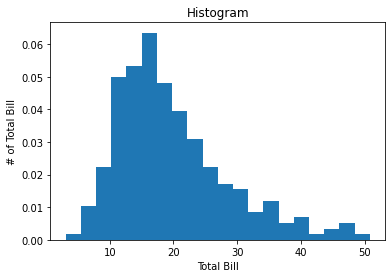

In [34]:
# 히스토그램(histogram) : 연속형 변수를 일정한 구간으로 나눠서 그 구간 안에 포함된 데이터 개수를 막대로 그린 그래프
plt.hist(tips["total_bill"], bins=20, density=True)
# bins=히스토그램의 막대 개수(기본값은 10)
# density=True : y축이 개수가 아니라 밀도(커널 덴서티)를 표현
plt.xlabel("Total Bill")
plt.ylabel("# of Total Bill")
plt.title("Histogram")
plt.show()

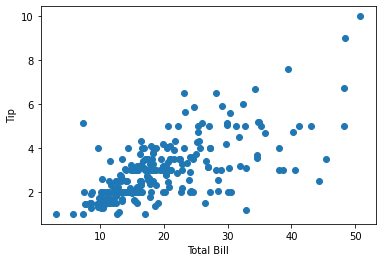

In [54]:
# 산점도 그래프(scatter plot) - 두 변수 간의 관계를 파악
# total_bill vs tip
plt.scatter(x=tips["total_bill"], y=tips["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

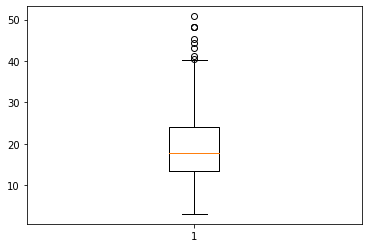

In [55]:
# 상자 그림(box plot) : 변수의 요약 통계량 - 최솟값, 최댓값, 사분위값
plt.boxplot(x=tips["total_bill"])
plt.show()

In [57]:
tips[["total_bill", "tip"]].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


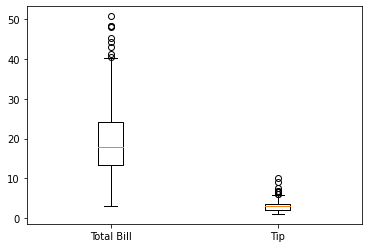

In [62]:
plt.boxplot(x=[tips["total_bill"], tips["tip"]],
            labels=["Total Bill", "Tip"])
plt.show()

In [65]:
# 성별 팁의 요약 통계량을 상자 그림(box plot)으로 시각화
# tips 데이터 프레임에서 여성의 tip 컬럼만 선택
tip_female = tips[tips["sex"] == "Female"]["tip"]
print(tip_female)
tip_female.describe()

0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64


count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

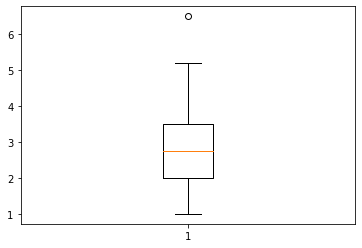

In [67]:
plt.boxplot(x=tip_female)
plt.show()

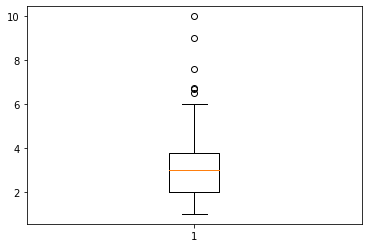

In [69]:
tip_male = tips[tips["sex"] == "Male"]["tip"]
plt.boxplot(x=tip_male)
plt.show()

In [70]:
tip_male.describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

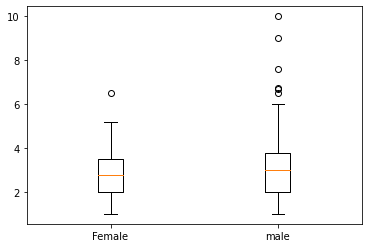

In [71]:
plt.boxplot(x=[tip_female, tip_male],
            labels=["Female", "male"])
plt.show()

In [76]:
tips.groupby("sex")["tip"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


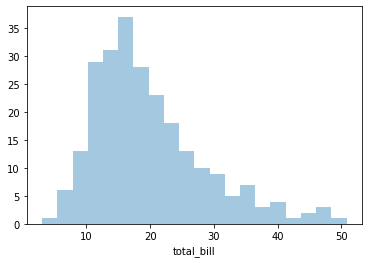

In [91]:
# seaborn 패키지를 이용한 히스토그램 - distribution plot
sns.distplot(tips["total_bill"], kde=False, bins=20)
# kde : Kernel Density Estimation
# kde=True(기본값) : 커널 밀도 함수, kde=False : 히스토그램(개수)
plt.show()

In [95]:
# 이산형 변수의 빈도수
size_cnt = tips["size"].value_counts()
print(type(size_cnt))
print(size_cnt.index)
print(size_cnt.values)

<class 'pandas.core.series.Series'>
Int64Index([2, 3, 4, 5, 6, 1], dtype='int64')
[156  38  37   5   4   4]


<BarContainer object of 6 artists>

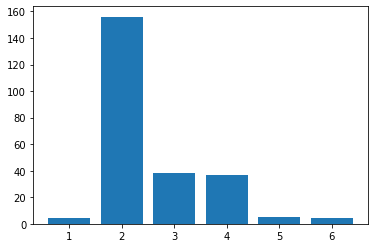

In [99]:
plt.bar(x=size_cnt.index, height=size_cnt.values)

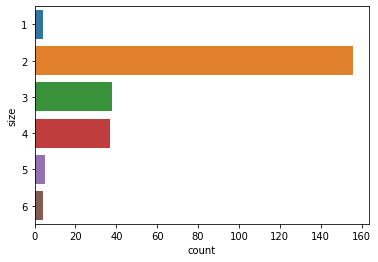

In [104]:
sns.countplot(y="size", data=tips)
plt.show()

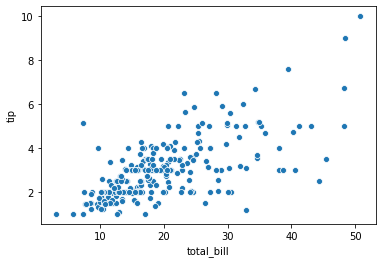

In [105]:
# seaborn 패키지를 사용한 산점도 그래프(scatter plot)
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

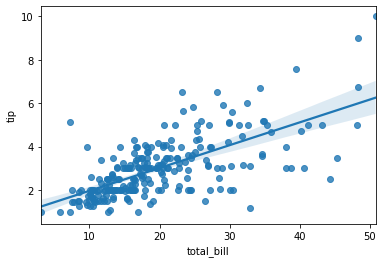

In [108]:
# 회귀 그래프(regression plot)
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()

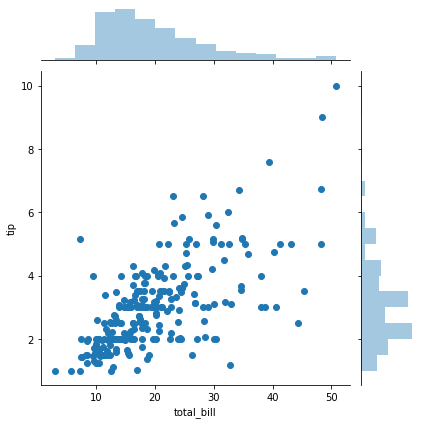

In [109]:
# Joint Plot
sns.jointplot(x="total_bill", y="tip", data=tips)
plt.show()

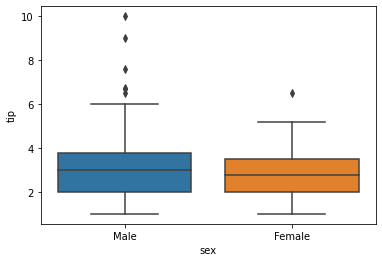

In [110]:
# 성별 tip의 요약 통계량 - boxplot
sns.boxplot(x="sex", y="tip", data=tips)
plt.show()

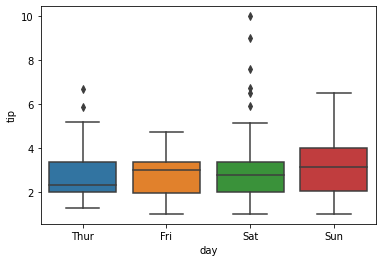

In [111]:
# 요일별 tip
sns.boxplot(x="day", y="tip", data=tips)
plt.show()

In [113]:
tips.groupby("day")["tip"].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50


In [116]:
# 성별 tip의 평균
tips.groupby("sex")["tip"].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

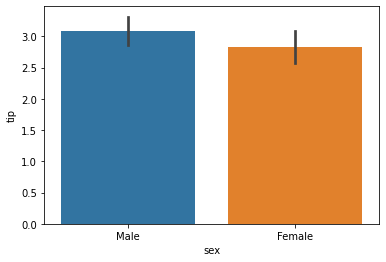

In [117]:
sns.barplot(x="sex", y="tip", data=tips)
plt.show()

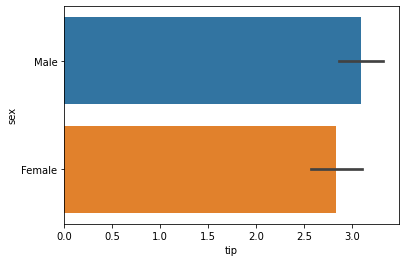

In [118]:
sns.barplot(x="tip", y="sex", data=tips)
plt.show()

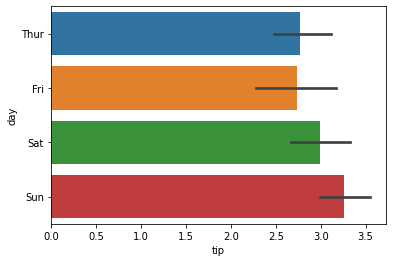

In [120]:
# 요일별 팁의 평균을 가로 막대 그래프
sns.barplot(x="tip", y="day", data=tips)
plt.show()

In [121]:
tips.groupby("day")["tip"].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [122]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [123]:
# 데이터 프레임에 컬럼 추가
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


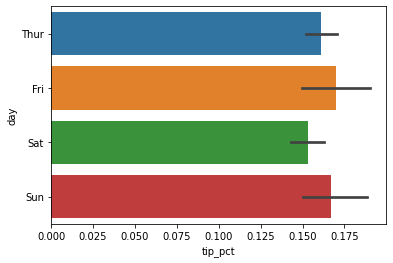

In [125]:
# 요일별 tip의 비율(tip_pct)
sns.barplot(x="tip_pct", y="day", data=tips)
plt.show()

In [126]:
# 성별, 요일별, 팁의 평균
tips.groupby(["sex", "day"])["tip"].mean()

sex     day 
Male    Thur    2.980333
        Fri     2.693000
        Sat     3.083898
        Sun     3.220345
Female  Thur    2.575625
        Fri     2.781111
        Sat     2.801786
        Sun     3.367222
Name: tip, dtype: float64

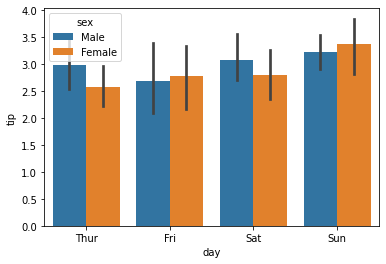

In [129]:
sns.barplot(x="day", y="tip", hue="sex", data=tips)
plt.show()

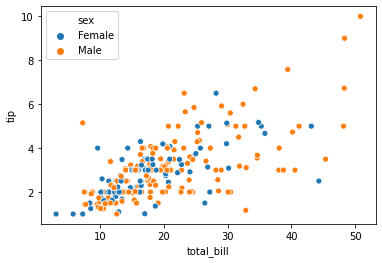

In [133]:
sns.scatterplot(x="total_bill", y="tip", hue="sex", data=tips)
plt.show()

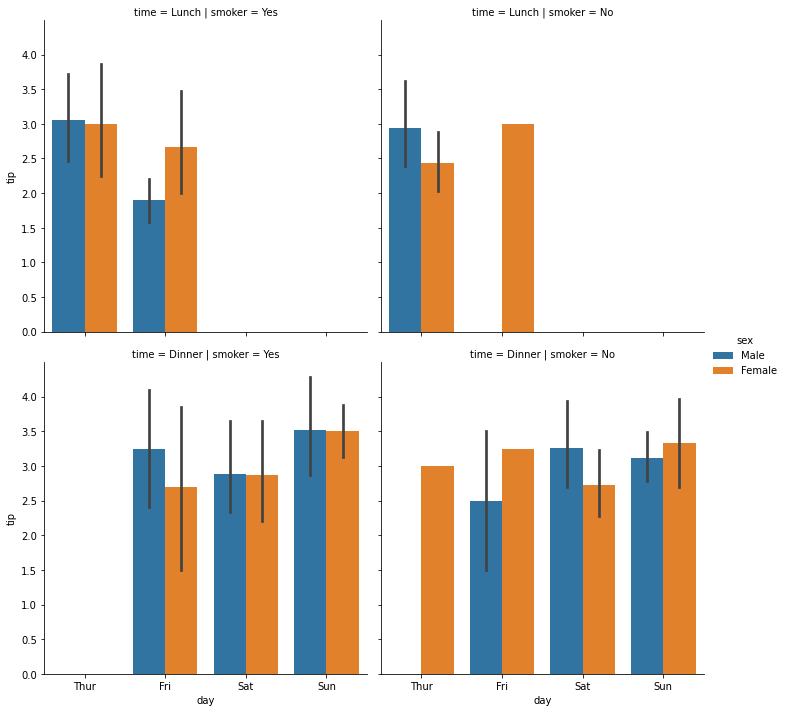

In [142]:
# category plot : 카테고리 별로 subplot으로 나눠서 그리는 그래프
sns.catplot(x="day", y="tip", data=tips,
            col="smoker", row="time",
            kind="bar", hue="sex")
plt.show()